In [1]:
#IMPORT THE CEREAL DATASET

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df=pd.read_csv('cereal.csv')
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [20]:
#1) Tabulate the following attributes: mfr, and type of cereals

#use crosstab for tabulating
print(pd.crosstab(df['mfr'],df['type']))

type   C  H
mfr        
A      0  1
G     22  0
K     23  0
N      5  1
P      9  0
Q      7  1
R      8  0


In [21]:
#2) Display the 5 number summary for all nutritional attributes starting from calories to vitamins.

dfnew=df[df.columns[3:12]]
dfnew.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000


In [36]:
#3) For missing values find and replace with arithmetic mean of the attributes.

original_df=df
mean=df[["calories","protein","fat","sodium","fiber","carbo","sugars","potass","vitamins","shelf","weight","cups","rating"]].mean()
df=df.mask(df==-1).fillna(mean)

df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,110.0,4.0,1,130.0,2.0,5.0,6.0,90.000000,25.0,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120.0,3.0,5,180.0,2.0,8.0,8.0,135.000000,25.0,3,1.0,1.00,33.983679
2,All-Bran,K,C,110.0,4.0,1,260.0,2.0,7.0,5.0,90.000000,25.0,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,110.0,4.0,0,140.0,2.0,8.0,0.0,90.000000,25.0,3,1.0,0.50,40.400208
4,Almond Delight,R,C,110.0,2.0,2,200.0,1.0,14.0,8.0,98.666667,25.0,3,1.0,0.75,34.384843


In [37]:
#Q4)  Find and replace outliers with median.

q1=df[["calories","protein","fat","sodium","fiber","carbo","sugars","potass","vitamins","shelf","weight","cups","rating"]].quantile(0.25)
q3=df[["calories","protein","fat","sodium","fiber","carbo","sugars","potass","vitamins","shelf","weight","cups","rating"]].quantile(0.75)

median=df[["calories","protein","fat","sodium","fiber","carbo","sugars","potass","vitamins","shelf","weight","cups","rating"]].median()
iqr=q3-q1

iqr1=q1-(1.5*iqr)
iqr3=q3+(1.5*iqr)

df=df.mask(df>iqr3).fillna(median)
df=df.mask(df<iqr1).fillna(median)

df.head()

C:\Users\Anand Singh\AppData\Local\Temp\ipykernel_2432\3221918741.py:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df.mask(df>iqr3).fillna(median)
C:\Users\Anand Singh\AppData\Local\Temp\ipykernel_2432\3221918741.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df.mask(df<iqr1).fillna(median)


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,110.0,4.0,1,130.0,2.0,5.0,6.0,90.000000,25.0,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120.0,3.0,5,180.0,2.0,8.0,8.0,135.000000,25.0,3,1.0,1.00,33.983679
2,All-Bran,K,C,110.0,4.0,1,260.0,2.0,7.0,5.0,90.000000,25.0,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,110.0,4.0,0,140.0,2.0,8.0,0.0,90.000000,25.0,3,1.0,0.50,40.400208
4,Almond Delight,R,C,110.0,2.0,2,200.0,1.0,14.0,8.0,98.666667,25.0,3,1.0,0.75,34.384843


In [40]:
#5) Compare the 5 number summary before and after preprocessing.

print("BEFORE PREPROCESSING: ")
print(original_df.describe())

print("AFTER PREPROCESSING:")
print(df.describe())

BEFORE PREPROCESSING: 
         calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  77.000000   
mean   107.272727   2.441558   1.012987  183.181818   1.801299  14.802632   
std      8.051865   0.895802   1.006473   51.234170   1.510707   3.881534   
min     90.000000   1.000000   0.000000   45.000000   0.000000   5.000000   
25%    100.000000   2.000000   0.000000  150.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.802632   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    120.000000   4.000000   5.000000  290.000000   6.000000  23.000000   

          sugars      potass  vitamins      shelf  weight       cups  \
count  77.000000   77.000000      77.0  77.000000    77.0  77.000000   
mean    7.026316   84.121212      25.0   2.207792     1.0   0.811299   
std     4.349754   44.778562       0.0   0.832524     0.0   0.21922

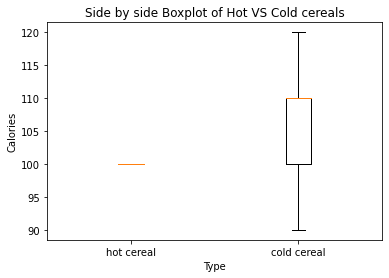

In [43]:
#6) Draw side-by-side box plots of Calories of Hot Vs cold cereals.

hot=df[df['type']=='H']['calories']
cold=df[df['type']=='C']['calories']

plt.boxplot([hot,cold],labels=["hot cereal","cold cereal"])
plt.title("Side by side Boxplot of Hot VS Cold cereals")
plt.xlabel("Type")
plt.ylabel("Calories")
plt.show()

In [46]:
#7) Are the attributes calories and consumer rating correlated?

print(df['calories'].corr(df['rating']))
print("Negative moderately correlated")

-0.5697325224975478
Negative moderately correlated


In [47]:
#8) Are the attributes mfr and consumer rating correlated?
print(df['mfr'].corr(df['rating']))
print("Negative moderately correlated")

#NOTE: WE CANNOT USE THIS METHOD OF CORRELATION
#AS WE ARE COMPARING MFR(STRING) AND RATING(INT)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [52]:
#ALTERNATIVE FOR THIS.

from scipy.stats import chi2_contingency
x = np.array(df.mfr)
y = np.array(df.rating)

contingency_table = pd.crosstab(x,y)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared Statistic: ", chi2)
print('p value',p)

if p > 0.05:
    print('not correlated')
else:
    print('correlated')



Chi-squared Statistic:  458.57608695652175
p value 0.37970220935672216
not correlated


In [54]:
#9) Which is the best Vs worst cereal in terms of user rating?

best=df.loc[df['rating'].idxmax(),'name']
worst=df.loc[df['rating'].idxmin(),'name']
print("Best cereal according to user rating is: ",best)
print("Worst cereal according to user rating is: ",worst)

Best cereal according to user rating is:  Shredded Wheat 'n'Bran
Worst cereal according to user rating is:  Cap'n'Crunch


In [59]:
#10) Which is the best Vs worst cereal in terms of calories?

best=df.loc[df['calories'].idxmax(),'name']
worst=df.loc[df["calories"].idxmin(),'name']
print("Best cereal according to calories is: ",best)
print("Worst cereal according to calories is: ",worst)

Best cereal according to calories is:  100% Natural Bran
Worst cereal according to calories is:  Bran Chex


In [62]:
#11) Rate the top 5 cereals in terms of user rating?

dfnew=df.sort_values(by="rating",ascending=False).head()
print(dfnew['name'])

64       Shredded Wheat 'n'Bran
65    Shredded Wheat spoon size
0                     100% Bran
63               Shredded Wheat
20       Cream of Wheat (Quick)
Name: name, dtype: object


In [63]:
#12) Identify the cereal with the highest sodium.
best=df.loc[df['sodium'].idxmax(),'name']
print("Cereal with highest sodium is: ",best)

Cereal with highest sodium is:  Cheerios


In [65]:
#13) Identify the cereal with the lowest carbohydrate.

low=df.loc[df['carbo'].idxmin(),'name']
print("Cereal with lowest carbohydrate is: ",low)

Cereal with lowest carbohydrate is:  100% Bran


In [66]:
# 14) Are the variable shelf and sugar correlated?

#ALTERNATIVE METHOD
contingency_table = pd.crosstab(df.shelf,df.sugars)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared Statistic: ", chi2)
print('p value',p)
if p > 0.05:
    print('not correlated')
else:
    print('correlated')

Chi-squared Statistic:  46.91720492470493
p value 0.0431370941275784
correlated


In [76]:
# 15) Identify the manufacturer of the cereal with the highest sugar content.

print("Cereal with highest sugar content is: ",df.loc[df['sugars'].idxmax(),'name'])

Cereal with highest sugar content is:  Golden Crisp


In [77]:
# 16) Replace missing values with mean.

mean=df[["calories","protein","fat","sodium","fiber","carbo","sugars","potass","vitamins","shelf","weight","cups","rating"]].mean()
df=df.mask(df==-1).fillna(mean)
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,110.0,4.0,1,130.0,2.0,5.0,6.0,90.000000,25.0,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120.0,3.0,5,180.0,2.0,8.0,8.0,135.000000,25.0,3,1.0,1.00,33.983679
2,All-Bran,K,C,110.0,4.0,1,260.0,2.0,7.0,5.0,90.000000,25.0,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,110.0,4.0,0,140.0,2.0,8.0,0.0,90.000000,25.0,3,1.0,0.50,40.400208
4,Almond Delight,R,C,110.0,2.0,2,200.0,1.0,14.0,8.0,98.666667,25.0,3,1.0,0.75,34.384843


In [84]:
#17) Find outliers using 1.5 * IQR

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

iqr=q3-q1

iqr1=q1-(1.5*iqr)
iqr3=q3+(1.5*iqr)

outliers=((df<iqr1) | (df>iqr3)).any(axis=1)

print(df[outliers])

Empty DataFrame
Columns: [name, mfr, type, calories, protein, fat, sodium, fiber, carbo, sugars, potass, vitamins, shelf, weight, cups, rating]
Index: []


C:\Users\Anand Singh\AppData\Local\Temp\ipykernel_2432\2483382377.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers=((df<iqr1) | (df>iqr3)).any(axis=1)
C:\Users\Anand Singh\AppData\Local\Temp\ipykernel_2432\2483382377.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers=((df<iqr1) | (df>iqr3)).any(axis=1)
